In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import AR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./PRSA_data_2010.1.1-2014.12.31.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [3]:
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [4]:
df = df.dropna()
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cbwd'] = le.fit_transform(df['cbwd'])

df = df.iloc[:,1:] # remove row number column
df

/var/folders/l4/ngfzh79n7kl3fb2wpwpc9zj80000gn/T/ipykernel_46283/2253441171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cbwd'] = le.fit_transform(df['cbwd'])


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,1,246.72,0,0


In [6]:
# convert to datetime
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']], format='%Y/%m/%d, %H')

In [7]:
df.index = df['datetime']
df = df.drop(['year','month','day','hour'], axis = 1)
df = df.iloc[:,:-1]
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1,242.70,0,0


In [9]:
df_diff = df.diff().dropna()

X = df_diff[['pm2.5','DEWP','PRES','cbwd','Iws','Is','Ir']]

thresh = int(len(X)*0.3)
train = X[:thresh]
test = X[-thresh:]

In [10]:
model = VAR(train)
results_aic = []
for p in range(1,10):
    results = model.fit(p)
    results_aic.append(results.aic)

/Users/dayeonku/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


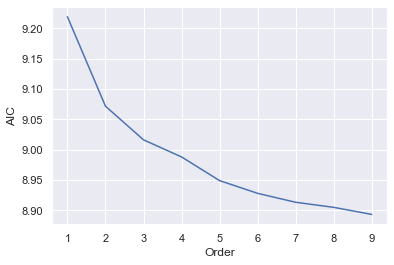

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [12]:
result = model.fit(10)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 16, Apr, 2022
Time:                     23:14:43
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    9.17298
Nobs:                     12516.0    HQIC:                   8.97658
Log likelihood:          -179376.    FPE:                    7170.63
AIC:                      8.87775    Det(Omega_mle):         6892.25
--------------------------------------------------------------------
Results for equation pm2.5
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.024082         0.226675           -0.106           0.915
L1.pm2.5          0.103602         0.009028           11.475           0.000
L1.DEWP           1.906238         0.177276           10.753           0.000

In [13]:
lagged_values = train.values[:]

forecast = pd.DataFrame(results.forecast(y=lagged_values, steps=len(test)), index = test.index, columns= ['pm2.5','DEWP','PRES','cbwd','Iws','Is','Ir'])
forecast

,pm2.5,DEWP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,
2013-07-22 01:00:00,-4.676569,-0.036504,-0.088650,0.006963,-0.441167,0.005068,0.046999
2013-07-22 02:00:00,-2.619357,-0.071549,-0.112074,0.015349,-0.844026,0.008171,-0.021045
2013-07-22 03:00:00,-0.957402,0.037856,0.029645,-0.088028,-0.774844,0.005257,0.098523
2013-07-22 04:00:00,-1.869542,-0.036252,0.049094,0.076275,0.261161,0.002334,-0.052198
2013-07-22 05:00:00,-1.748297,0.073814,0.050329,-0.050980,-1.070132,0.002484,0.038854
...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-0.000350,0.002572,-0.001822,0.000002,0.002337,-0.000010,0.000014
2014-12-31 20:00:00,-0.000350,0.002572,-0.001822,0.000002,0.002337,-0.000010,0.000014
2014-12-31 21:00:00,-0.000350,0.002572,-0.001822,0.000002,0.002337,-0.000010,0.000014


In [14]:
forecast['pm2.5'] = df['pm2.5'].iloc[-thresh-1] + forecast['pm2.5'].cumsum()
forecast['DEWP'] = df['DEWP'].iloc[-thresh-1] + forecast['DEWP'].cumsum() 
forecast['PRES'] = df['PRES'].iloc[-thresh-1] + forecast['PRES'].cumsum() 
forecast['cbwd'] = df['cbwd'].iloc[-thresh-1] + forecast['cbwd'].cumsum() 
forecast['Iws'] = df['Iws'].iloc[-thresh-1] + forecast['Iws'].cumsum() 
forecast['Is'] = df['Is'].iloc[-thresh-1] + forecast['Is'].cumsum() 
forecast['Ir'] = df['Ir'].iloc[-thresh-1] + forecast['Ir'].cumsum() 
forecast

,pm2.5,DEWP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,
2013-07-22 01:00:00,56.323431,20.963496,1004.911350,2.006963,22.788833,0.005068,0.046999
2013-07-22 02:00:00,53.704073,20.891947,1004.799276,2.022312,21.944808,0.013239,0.025954
2013-07-22 03:00:00,52.746671,20.929803,1004.828921,1.934284,21.169964,0.018496,0.124477
2013-07-22 04:00:00,50.877129,20.893551,1004.878015,2.010560,21.431125,0.020830,0.072278
2013-07-22 05:00:00,49.128832,20.967364,1004.928344,1.959580,20.360993,0.023314,0.111133
...,...,...,...,...,...,...,...
2014-12-31 19:00:00,47.329327,53.133435,982.267947,2.024708,49.916958,-0.108059,0.295314
2014-12-31 20:00:00,47.328977,53.136007,982.266125,2.024710,49.919295,-0.108069,0.295328
2014-12-31 21:00:00,47.328627,53.138578,982.264303,2.024712,49.921633,-0.108079,0.295342


In [15]:
from sklearn.metrics import mean_squared_error


mean_squared_error(test, forecast, squared=False)

161.17330224662427